Importing Libraries:
- The code begins by importing the required libraries.
- torch for PyTorch.
- torch.nn for neural network modules.
- torch.optim for optimization algorithms.
- pandas for data handling.
- numpy for numerical computations.
- sklearn.model_selection for dataset splitting.
- sklearn.preprocessing for data preprocessing, and matplotlib.pyplot for plotting.

In [9]:
# Import dependencies
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

Loading Data:

The code loads the training and test datasets from CSV files (train.csv and test.csv) using pandas' read_csv function and assigns them to train_data and test_data, respectively.

In [10]:
# Set the maximum columns to be displayed to none.
pd.set_option('display.max_columns', None)

In [11]:
# Load the train dataset
train_data = pd.read_csv('clean_train.csv')
# train_data.drop('Id', axis=1, inplace=True)
train_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [12]:
# Load the test dataset
test_data = pd.read_csv('clean_test.csv')
# test_data.drop('Id', axis=1, inplace=True)
test_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2475,197,34,319,78,270,189,244,164,914,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Preprocessing Data:
- The code separates the features (X_train) and the target variable (y_train) from the training data.
- It assigns the test data features to X_test.
- It splits the training data into training and validation sets using train_test_split from scikit-learn. 
- The validation set size is set to 20% of the training data, and a random seed of 42 is used for reproducibility.
- The code initializes a StandardScaler object to scale the input features.
- It scales the training, validation, and test features using the scaler's fit_transform and transform methods.
- It initializes a LabelEncoder object to encode the target variable.
- The code encodes the target variable for the training and validation sets using the encoder's fit_transform and transform methods, respectively.

In [13]:
# Separate features (X) and target variable (y) for training data
X_train = train_data.drop('Cover_Type', axis=1)
y_train = train_data['Cover_Type']

In [14]:
# Separate features (X) for test data
X_test = test_data

In [15]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

Converting Data to PyTorch Tensors:
- The code converts the preprocessed data to PyTorch tensors using torch.tensor. 
- The training and validation features are assigned to X_train_tensor and X_val_tensor, respectively. 
- The encoded training and validation target variables are assigned to y_train_tensor and y_val_tensor, respectively. 
- The test features are assigned to X_test_tensor.

In [18]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

Defining the Neural Network Model:
- The code defines a sequential neural network model using nn.Sequential.
- The model consists of five fully connected (linear) layers with ReLU activation functions between them.
- The input size of the first layer is determined by the number of features in the training data (X_train_tensor.shape[1]), and the output size of the last layer is set to 7, assuming 7 classes for the target variable (7 cover types).

In [19]:
# Define the neural network model
#model = nn.Sequential(
#    nn.Linear(X_train_tensor.shape[1], 128),
#    nn.ReLU(),
#    nn.Linear(128, 64),
#    nn.ReLU(),
#    nn.Linear(64, 7)  # Assuming 7 classes for the target variable
#)

model = nn.Sequential(
    nn.Linear(X_train_tensor.shape[1], 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    #nn.Tanh(),
    nn.ReLU(),
    nn.Linear(256, 128),
    #nn.Sigmoid(),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 7)  # Assuming 7 classes for the target variable
)

Defining Loss Function and Optimizer:
- The code defines the loss function using nn.CrossEntropyLoss, which is appropriate for multi-class classification tasks.
- It defines the optimizer using optim.Adam and passes the model's parameters and a learning rate of 0.001.

In [20]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

In [21]:
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training Loop:
- The code specifies the number of training epochs and batch size.
- It calculates the number of batches based on the training data size and batch size.
- It initializes empty lists to store training and validation accuracies for each epoch.
- The training loop consists of nested loops for epochs and batches.
- For each batch, a forward pass is performed by feeding a batch of training data to the model.
- The loss is computed based on the predicted outputs and the actual target values.
- Backpropagation is performed to compute the gradients and update the model's parameters using the optimizer.
- After each epoch, the model is evaluated on the validation set by calculating the loss and accuracy.
- The training and validation accuracies for the current batch are appended to the respective lists.
- The progress is printed, showing the epoch number, loss, validation loss, and validation accuracy.

In [22]:
# Training loop
num_epochs = 100
#batch_size = 32
batch_size = 64
num_batches = len(X_train_tensor) // batch_size
train_accuracy_list = []
val_accuracy_list = []

for epoch in range(num_epochs):
    for batch in range(num_batches):
        start = batch * batch_size
        end = (batch + 1) * batch_size
        
        # Forward pass
        outputs = model(X_train_tensor[start:end])
        loss = criterion(outputs, y_train_tensor[start:end])
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Validate the model
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_accuracy = (val_outputs.argmax(dim=1) == y_val_tensor).float().mean()
        
    train_accuracy_list.append((outputs.argmax(dim=1) == y_train_tensor[start:end]).float().mean().item())
    val_accuracy_list.append(val_accuracy.item())
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy.item():.4f}")

Epoch 1/100, Loss: 0.6320, Val Loss: 0.7180, Val Accuracy: 0.7027
Epoch 2/100, Loss: 0.5404, Val Loss: 0.6784, Val Accuracy: 0.7285
Epoch 3/100, Loss: 0.4836, Val Loss: 0.6550, Val Accuracy: 0.7318
Epoch 4/100, Loss: 0.4446, Val Loss: 0.6337, Val Accuracy: 0.7424
Epoch 5/100, Loss: 0.3955, Val Loss: 0.6072, Val Accuracy: 0.7583
Epoch 6/100, Loss: 0.3678, Val Loss: 0.5888, Val Accuracy: 0.7649
Epoch 7/100, Loss: 0.3586, Val Loss: 0.5790, Val Accuracy: 0.7669
Epoch 8/100, Loss: 0.3510, Val Loss: 0.5796, Val Accuracy: 0.7698
Epoch 9/100, Loss: 0.3669, Val Loss: 0.5623, Val Accuracy: 0.7778
Epoch 10/100, Loss: 0.3713, Val Loss: 0.5586, Val Accuracy: 0.7798
Epoch 11/100, Loss: 0.3672, Val Loss: 0.5482, Val Accuracy: 0.7854
Epoch 12/100, Loss: 0.3348, Val Loss: 0.5344, Val Accuracy: 0.7927
Epoch 13/100, Loss: 0.3000, Val Loss: 0.5260, Val Accuracy: 0.8006
Epoch 14/100, Loss: 0.3309, Val Loss: 0.5139, Val Accuracy: 0.8046
Epoch 15/100, Loss: 0.3534, Val Loss: 0.5137, Val Accuracy: 0.8092
Epoc

Evaluating the Model on Test Data:
- After training, the code evaluates the trained model on the test data.
- It performs a forward pass on the test features to obtain the model's predictions.
- The predictions are inverse transformed using the label encoder to obtain the original class labels.
- The test predictions are stored in the Cover_Type column of the test_data DataFrame.

In [23]:
# Evaluate the model on the test data
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = label_encoder.inverse_transform(test_outputs.argmax(dim=1).numpy())

Saving Test Predictions to CSV:

The code saves the test data with the added Cover_Type predictions to a new CSV file named test_predictions2.csv, excluding the index column.

In [24]:
# Save the test predictions to a CSV file
test_data['Cover_Type'] = test_predictions
test_data.to_csv('test_predictions.csv', index=False)

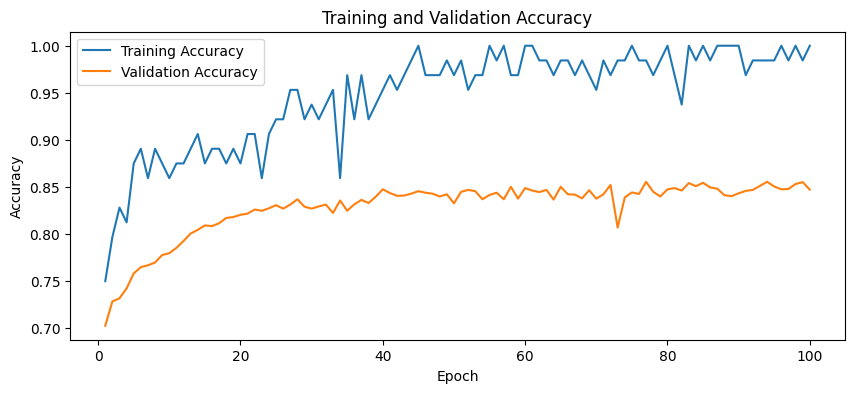

In [25]:
# Plot training and validation performance metrics
plt.figure(figsize=(10, 4))
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, val_accuracy_list, label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

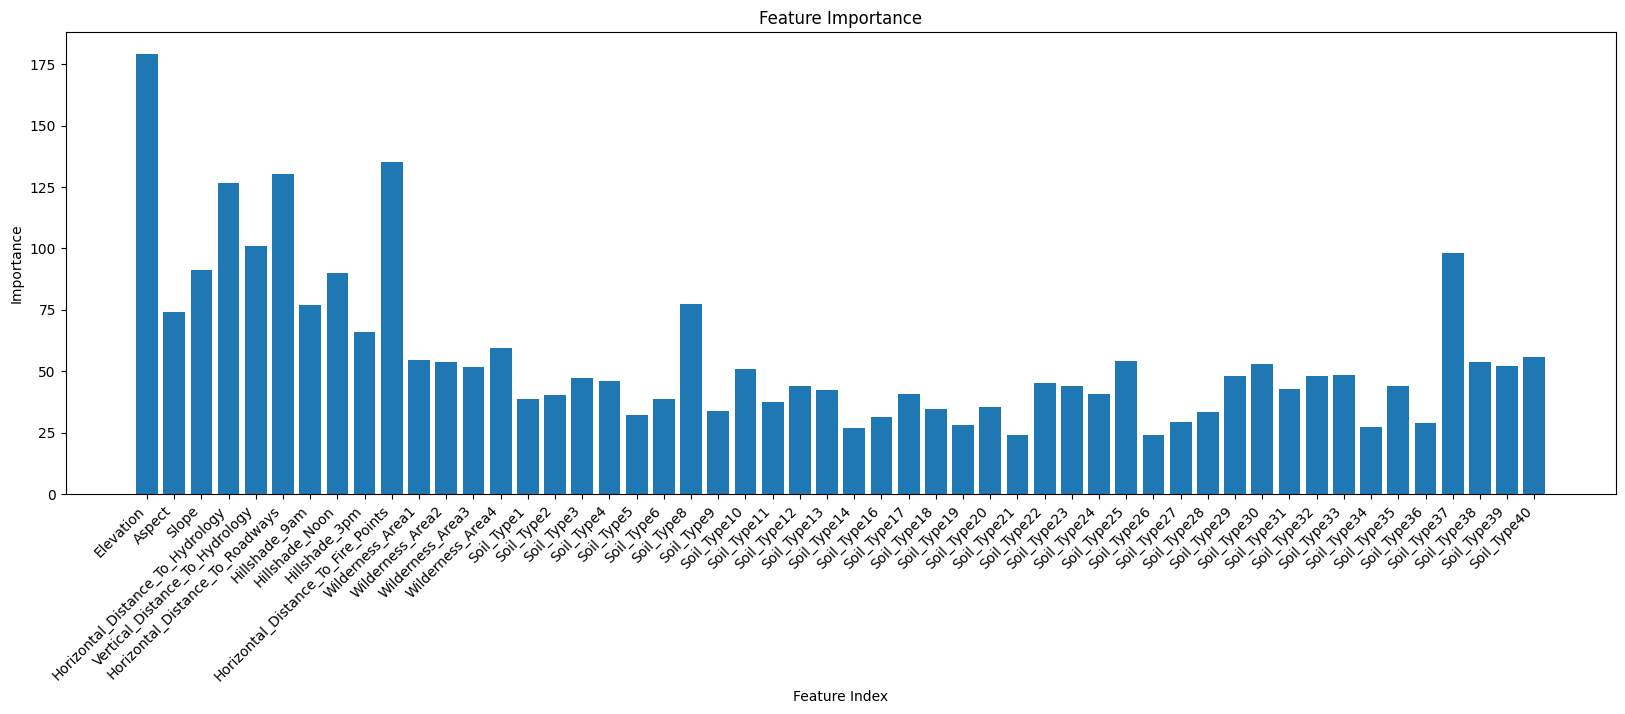

In [26]:
# Get the weights of the linear layers
linear_layer_weights = model[0].weight.data

# Compute feature importance by summing weights along each feature dimension
feature_importance = linear_layer_weights.abs().sum(dim=0)

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot feature importance
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Set the xticks with the header names from train_data dataframe
plt.xticks(range(len(feature_importance)), train_data.columns[:-1], rotation=45, ha='right', fontsize=10)

# Show the plot
#plt.tight_layout()
plt.show()

In [18]:
#from sklearn.metrics import confusion_matrix
#import seaborn as sns

# Get predictions on validation data
#with torch.no_grad():
#    val_outputs = model(X_val_tensor)
#    val_predictions = val_outputs.argmax(dim=1).numpy()

# Create confusion matrix
#conf_matrix = confusion_matrix(y_val_encoded, val_predictions)

# Plot confusion matrix as a heatmap
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.title('Confusion Matrix')
#plt.show()

In [19]:
# Plot histograms for each feature in X_train_scaled
#fig, axs = plt.subplots(nrows=X_train_scaled.shape[1]-1, figsize=(8, 6 * (X_train_scaled.shape[1]-1)))

#for i, feature_name in enumerate(X_train.columns[1:]):
#    axs[i].hist(X_train_scaled[:, i+1], bins=20)
#    axs[i].set_xlabel(feature_name)
#    axs[i].set_ylabel('Count')

#plt.tight_layout()
#plt.show()